# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
!pip install citypy

ERROR: Could not find a version that satisfies the requirement citypy (from versions: none)
ERROR: No matching distribution found for citypy


In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [127]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [128]:
cities

['flying fish cove',
 'zemio',
 'letlhakane',
 'longyearbyen',
 'bilibino',
 'tura',
 'tayoltita',
 'weno',
 'itaituba',
 'vilyuchinsk',
 'ola',
 'waitangi',
 'kavaratti',
 'el soberbio',
 'el quebrachal',
 'chu',
 'grytviken',
 'west island',
 'mombetsu',
 'suncho corral',
 'shache',
 'howard springs',
 'east london',
 'siwa oasis',
 'ust-tsilma',
 'amahai',
 'rio grande',
 'port alfred',
 'edinburgh of the seven seas',
 'arraial do cabo',
 'adamstown',
 'guerrero negro',
 'talnakh',
 'kara suu',
 'sitka',
 'kingston',
 'wailua homesteads',
 'port-aux-francais',
 'kota belud',
 'uturoa',
 'blackmans bay',
 'olhao',
 "nar'yan-mar",
 'puerto natales',
 'port augusta',
 'waveland',
 'whakatane',
 'albany',
 'konarka',
 "ts'khinvali",
 'vorgashor',
 'raub',
 'revda',
 'ebon',
 'mpanda',
 'port elizabeth',
 'sao joao da barra',
 'margaret river',
 'darlowo',
 'aasiaat',
 'tamanrasset',
 'orkney',
 'bethel',
 'nicoya',
 'olonkinbyen',
 'gudauta',
 'minot',
 'khorugh',
 'petropavlovsk-kamcha

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [129]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=b79cc516f0cd5f00393e83c5425f9bef&q=san francisco


In [130]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flying fish cove
Processing Record 2 of Set 1 | zemio
Processing Record 3 of Set 1 | letlhakane
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | tayoltita
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | itaituba
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | el soberbio
Processing Record 15 of Set 1 | el quebrachal
Processing Record 16 of Set 1 | chu
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | mombetsu
Processing Record 20 of Set 1 | suncho corral
Processing Record 21 of Set 1 | shache
Processing Record 22 of Set 1 | howard springs
Processing Record 23 of Set 

In [131]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [132]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  flying fish cove -10.4217  105.6791     27.82        69          75   
1             zemio   5.0314   25.1361     21.19        96          98   
2        letlhakane -21.4167   25.5833      8.04        33           0   
3      longyearbyen  78.2186   15.6401      8.91        93         100   
4          bilibino  68.0546  166.4372     10.66        75          97   

   Wind Speed Country        Date  
0        6.17      CX  1722228974  
1        0.59      CF  1722228976  
2        4.65      BW  1722228977  
3        4.63      SJ  1722228978  
4        2.22      RU  1722228646

In [133]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [134]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                        
0        flying fish cove -10.4217  105.6791     27.82        69          75   
1                   zemio   5.0314   25.1361     21.19        96          98   
2              letlhakane -21.4167   25.5833      8.04        33           0   
3            longyearbyen  78.2186   15.6401      8.91        93         100   
4                bilibino  68.0546  166.4372     10.66        75          97   

         Wind Speed Country        Date  
City_ID                                  
0              6.17      CX  1722228974  
1              0.59      CF  1722228976  
2              4.65      BW  1722228977  
3              4.63      SJ  1722228978  
4              2.22      RU  1722228646

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

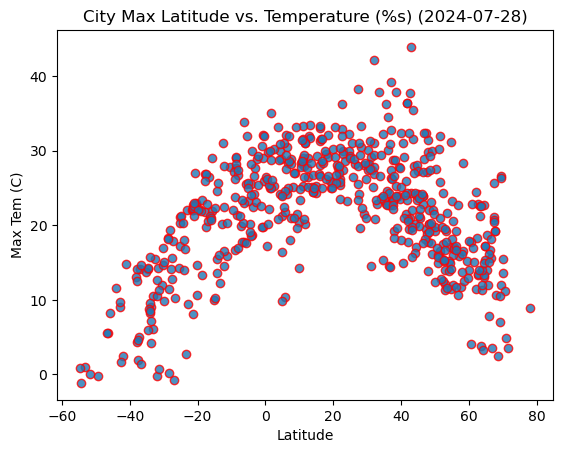

In [139]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = 'red',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Tem (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

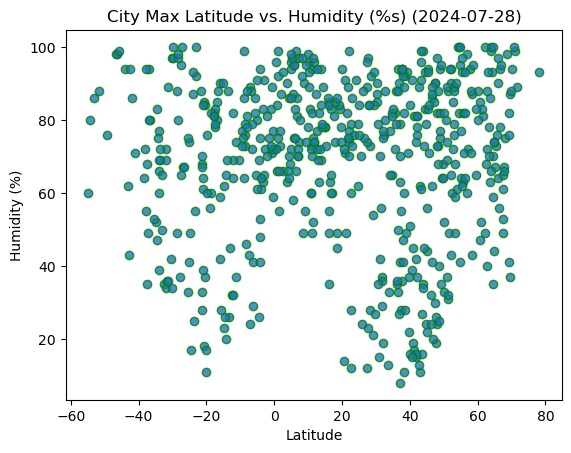

In [142]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = 'green',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

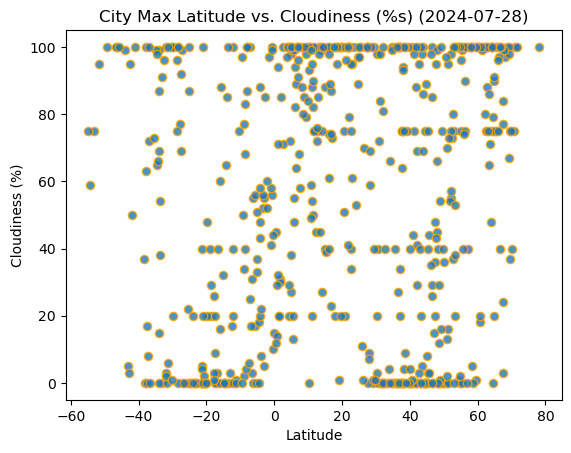

In [143]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = 'orange',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

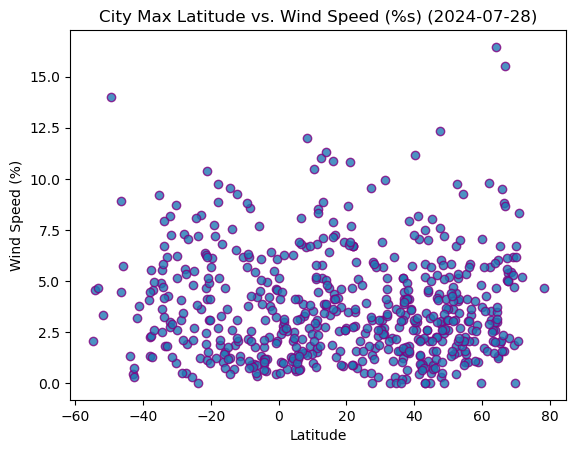

In [144]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = 'purple',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Wind Speed (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [155]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = 'red')
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()


In [156]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
1               zemio   5.0314   25.1361     21.19        96          98   
3        longyearbyen  78.2186   15.6401      8.91        93         100   
4            bilibino  68.0546  166.4372     10.66        75          97   
5                tura  25.5198   90.2201     30.99        70         100   
6           tayoltita  24.0833 -105.9333     23.30        91          53   

         Wind Speed Country        Date  
City_ID                                  
1              0.59      CF  1722228976  
3              4.63      SJ  1722228978  
4              2.22      RU  1722228646  
5              2.45      IN  1722228980  
6              2.04      MX  1722228981

In [157]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                        
0        flying fish cove -10.4217  105.6791     27.82        69          75   
2              letlhakane -21.4167   25.5833      8.04        33           0   
8                itaituba  -4.2761  -55.9836     25.48        53          88   
11               waitangi -43.9535 -176.5597     11.57        94          99   
13            el soberbio -27.2985  -54.1988     17.95       100          99   

         Wind Speed Country        Date  
City_ID                                  
0              6.17      CX  1722228974  
2              4.65      BW  1722228977  
8              0.92      BR  1722228613  
11             1.34      NZ  1722228576  
13             0.51      AR  1722228808

###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.31628088588203657


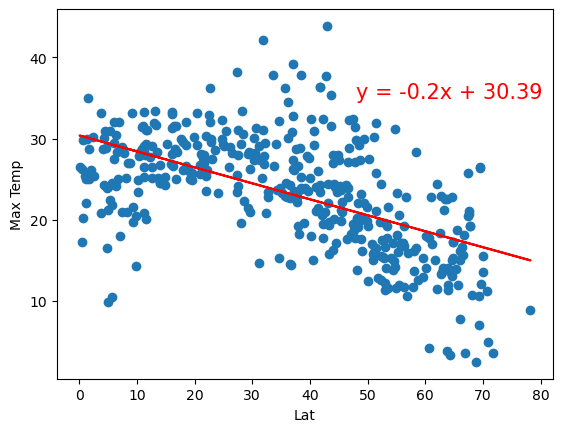

In [174]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (48, 35))

The r-value is 0.6191358083372114


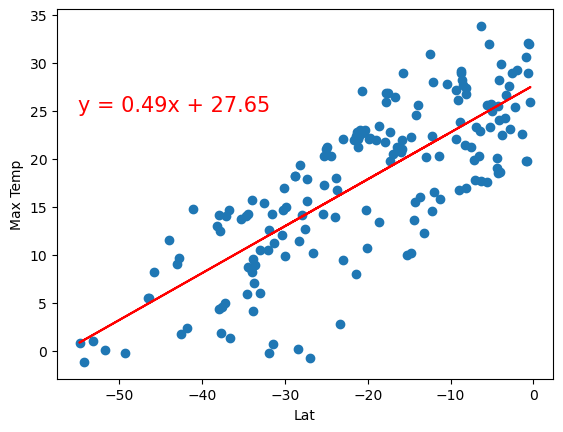

In [175]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 25))

**Discussion about the linear relationship:** 
1. Linear regression on Northern Hemisphere (y = -0.2x + 30.39):

This linear regression equation indicates that the correlation between maximum temperature and the Northern Hemisphere latitude has a (-) relationship. The maximum temperature tends to decrease with increasing latitude. The slope of the equation indicates that for every 1 degree increase in latitude, the maximum temperature decreases by 0.2 degrees.
2. Linear regression on Southern Hemisphere (y = 0.49x + 27.65):

This shaping regression equation shows the correlation between the highest temperature and latitude, based on the southern hemisphere. As you can see from the slope, for every 1 degree increase in latitude, the highest temperature increases by 0.49 degrees. It shows a (+) correlation, and the highest temperature increases as the stomach increases.



### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.005315155708145901


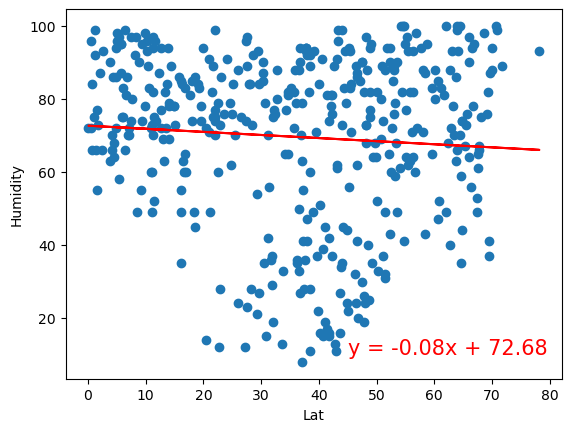

In [177]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))

The r-value is 0.004114139286574492


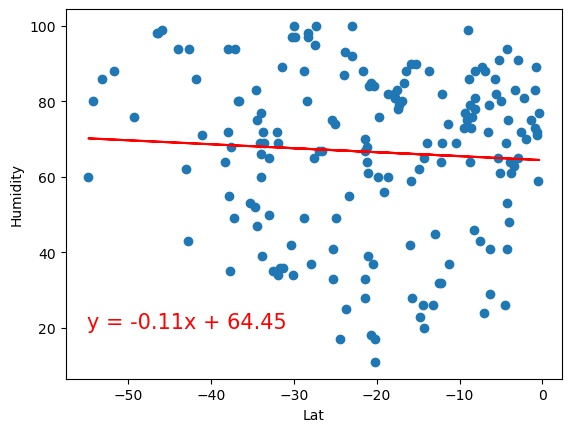

In [178]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 20))

**Discussion about the linear relationship:**
1. Northern Hemisphere (y = −0.08x + 72.68):

This linear regression equation has a negative (-) correlation that decreases the maximum humidity as the latitude increases. The value of the slope is -0.08, and the humidity at which the latitude increases by 1 degree decreases by 0.08% on average.

2. Southern Hemisphere (y = -0.11x + 64.45):

According to this linear regression equation, humidity appears to have a negative (-) correlation with increasing latitude in the southern hemisphere. We find that increasing latitude by 1 degree due to the slope of the equation decreases humidity by 0.11% on average.



### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.003409536347268896


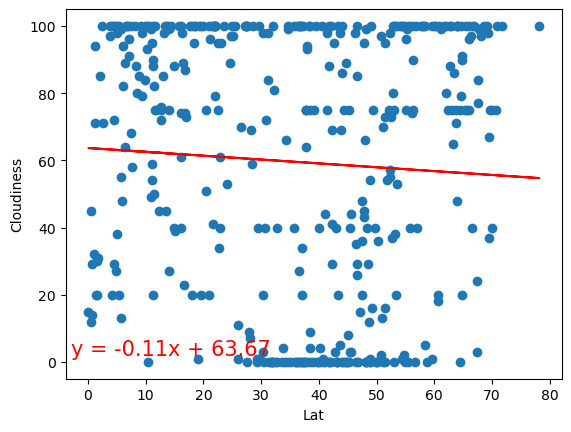

In [185]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-3, 2))

The r-value is 0.03587745357413229


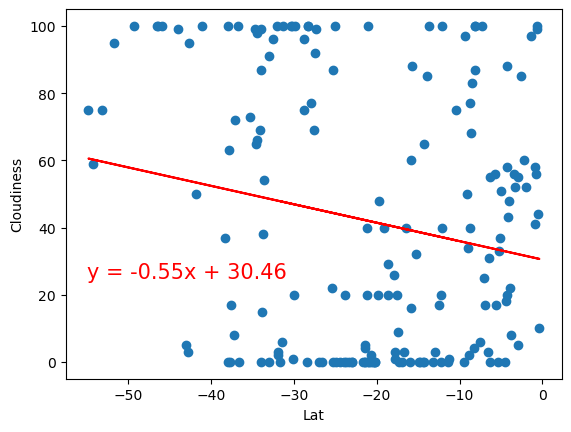

In [188]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 25))

**Discussion about the linear relationship:**
1. Northern Hemisphere (y = -0.11x + 63.67):

The slope of this linear regression equation is -0.11, which shows that an increase of 1 degree in latitude decreases the amount of clouds by 0.11%. This shows a negative (-) correlation in which clouds shrink as latitude increases. 

2. Southern Hemisphere (y = -0.55x + 30.46):

This linear regression equation shows that cloud cover tends to decrease as latitude increases in the Southern Hemisphere (i.e., toward Antarctica). For example, for every 1 degree increase in latitude, cloud cover decreases by about 0.55%. We can see that it has a (-) correlation. 



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0017081234262153674


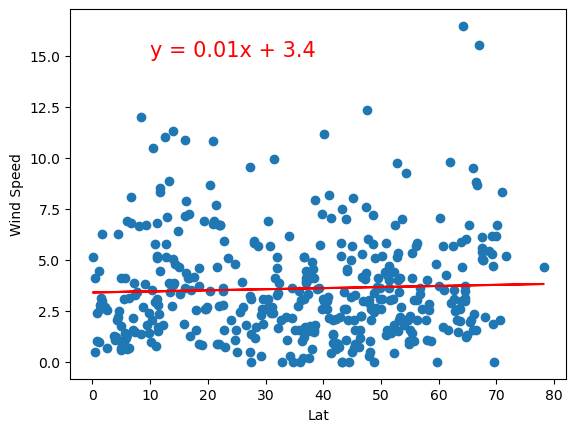

In [191]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.022458054554310665


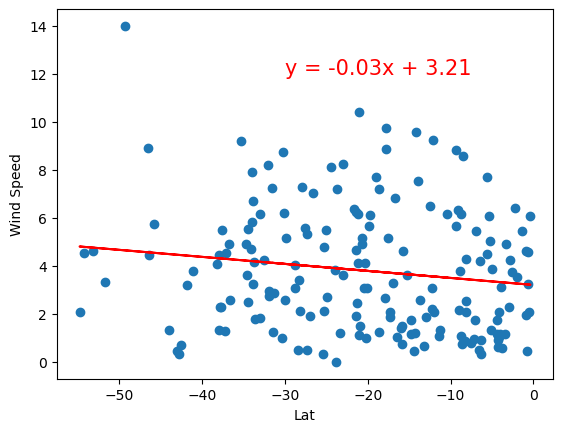

In [193]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30, 12))

**Discussion about the linear relationship:** 
1. Northern Hemisphere (y = 0.01x + 3.4):

This linear regression equation has a positive (+) correlation that we can see that the latitude increases with increasing Wind Speed. We can see that a 1 degree increase in latitude increases the wind speed by 0.01. This positive trend can be considered insignificant. 

2. Southern Hemisphere (y = -0.03x + 3.21):

This shaping regression equation shows that an increase of 1 degree in latitude decreases the wind speed by 0.03. It shows a (-) correlation, but we find that the relationship is minimal. Overall, the wind speed decreases slightly as the latitude increases.

